In [1]:
from datetime import datetime
from tables import open_file
import numpy as np

computed = open_file("/data/Indexed_TLE/precomp-sample.h5", mode="r")
sat_group = computed.get_node("/sat")


class SatelliteDataReader:
    def __init__(self, h5_node):
            self.node = h5_node

    def get_satellites_contained(self):
        return set(int(k.replace("s", "")) for k in dir(self.node) if not k.startswith("_"))

    def get_precomputed_tracks(self, norad_id: int, start: datetime, end: datetime):
        """
        Return telemetry for satellite with a given norad_id from `start` to `end` datetimes.
        The arrays returned will have `times` elements, which correspond to the
        number of integer minutes between the starting points of the two times.

        times, lats, longs, dist = get_precomputed_tracks(...)
        
        This returns an array:
        @returns np.array (4, times)
        """
        name = "s" + str(norad_id)    
        assert hasattr(self.node, name), "No Data for satellite with norad ID: %i" % norad_id
        dataz = getattr(self.node, name)[:]

        start_index = np.searchsorted(dataz[0, :], start.timestamp())
        end_index   = np.searchsorted(dataz[0, :], end.timestamp())
        return dataz[:, start_index: end_index]

In [2]:
t, lat, long, dist = SatelliteDataReader(sat_group).get_precomputed_tracks(312, datetime(2010, 1, 1), datetime(2020, 1, 1))

In [3]:
from pylab import *


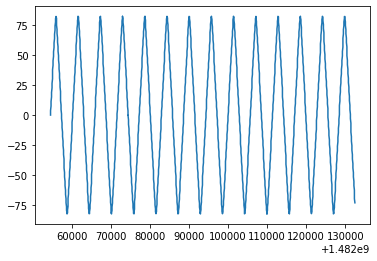

In [4]:
plot(t[0:1300], lat[0:1300])

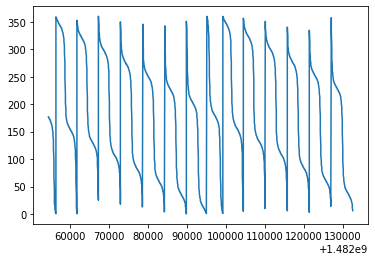

In [5]:
plot(t[0:1300], long[0:1300])